Import dependencies

In [60]:
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sns

Load all the data

In [61]:
biker_data = pd.read_csv('bikedata21.csv',sep=';',
                         usecols=["SENSOR_ID","YEAR","MONTH","DAY","STARTHOUR",
                                  "DIRECTION","RESOLUTION","SUM","AVGSPEED"])
met_data = pd.read_csv('Oslo_Blindern_Weather.csv',sep=';')

In [62]:
#First five data rows
biker_data.head()

,SENSOR_ID,YEAR,MONTH,DAY,STARTHOUR,DIRECTION,RESOLUTION,SUM,AVGSPEED
0,300016,2015,2,1,0,1,HOURLY,381,74.104986
1,300016,2015,2,1,1,1,HOURLY,284,74.419014
2,300016,2015,2,1,2,1,HOURLY,165,73.666666
3,300016,2015,2,1,3,1,HOURLY,98,74.846938
4,300016,2015,2,1,4,1,HOURLY,87,77.517241


In [63]:
#Last five data rows
biker_data.tail()

,SENSOR_ID,YEAR,MONTH,DAY,STARTHOUR,DIRECTION,RESOLUTION,SUM,AVGSPEED
101664,302257,2016,1,31,19,2,HOURLY,1636,75.483496
101665,302257,2016,1,31,20,2,HOURLY,1270,76.933858
101666,302257,2016,1,31,21,2,HOURLY,1019,77.225711
101667,302257,2016,1,31,22,2,HOURLY,627,77.811802
101668,302257,2016,1,31,23,2,HOURLY,353,79.000000


In [64]:
print("Sensor IDs for analysis: ", biker_data['SENSOR_ID'].unique())
print("Years that are analyzed: ", biker_data['YEAR'].unique())
print("Months that are analyzed: ", biker_data['MONTH'].unique())
print("Days that are analyzed: ", biker_data['DAY'].unique())
print("Start Hours that are analyzed: ", biker_data['STARTHOUR'].unique())
print("Directions that are analyzed: ", biker_data['DIRECTION'].unique())
print("Resolutions that are analyzed: ", biker_data['RESOLUTION'].unique())

Sensor IDs for analysis:  [300016 300083 300099 300233 302257]
Years that are analyzed:  [2015 2016]
Months that are analyzed:  [ 2  3  4  5  6  7  8  9 10 11 12  1]
Days that are analyzed:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]
Start Hours that are analyzed:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Directions that are analyzed:  [1 2]
Resolutions that are analyzed:  ['HOURLY' 'SINGLE']


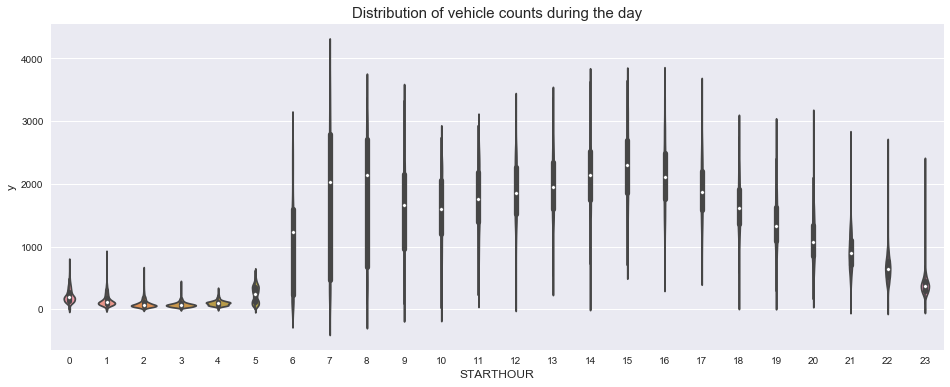

In [68]:
var_name = "STARTHOUR"
col_order = np.sort(biker_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='SUM', data=biker_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of vehicle counts during the day", fontsize=15)
plt.show()

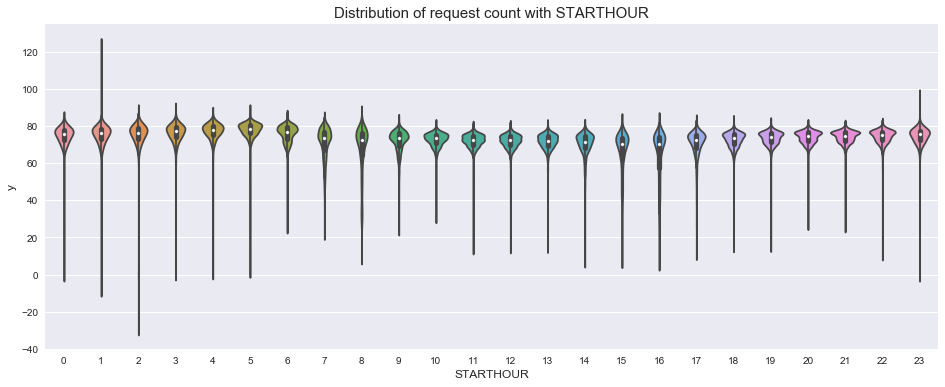

In [67]:
var_name = "STARTHOUR"
col_order = np.sort(biker_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='AVGSPEED', data=biker_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

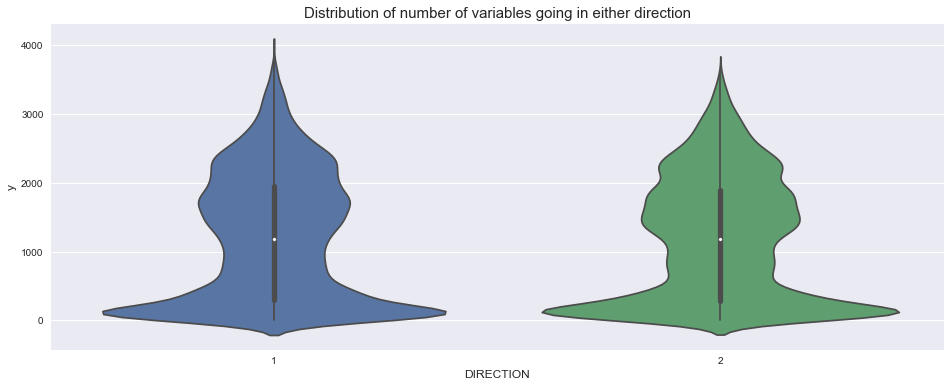

In [69]:
var_name = "DIRECTION"
col_order = np.sort(biker_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='SUM', data=biker_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of number of variables going in either direction", fontsize=15)
plt.show()

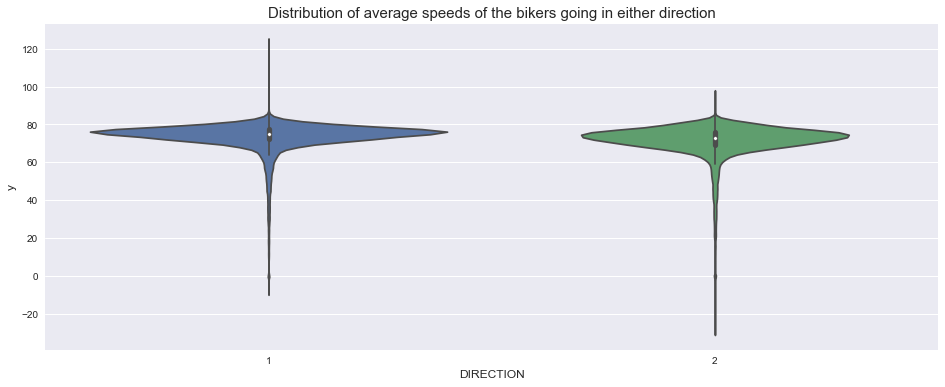

In [71]:
var_name = "DIRECTION"
col_order = np.sort(biker_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='AVGSPEED', data=biker_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average speeds of the bikers going in either direction", fontsize=15)
plt.show()

Observation from the data:
* There are 5 unique sensor IDs
* Data is available for between 01.02.2015 - 31.01.2016
* Direction is a categorical variable representing the direction of travel

Have a look at the raw data

In [15]:
met_data.head()

,St.no,Year,Mnth,Date,Time,DirectionDeg,Speedmps,TempC,Pptmm,Humidpercen,Snowdepthcm
0,18700,2015,2,1,1,7,5.8,-1.0,0.0,75,
1,18700,2015,2,1,2,6,6.2,-1.3,0.0,77,
2,18700,2015,2,1,3,12,6.5,-1.5,0.1,79,
3,18700,2015,2,1,4,7,5.9,-1.5,0.0,76,
4,18700,2015,2,1,5,5,6.3,-1.7,0.0,77,


In [73]:
met_data.tail()

,St.no,Year,Mnth,Date,Time,DirectionDeg,Speedmps,TempC,Pptmm,Humidpercen,Snowdepthcm
8779,18700,2016,2,1,20,222,2.0,0.3,0.0,98,
8780,18700,2016,2,1,21,216,2.7,0.3,0.0,99,
8781,18700,2016,2,1,22,222,2.5,0.4,0.0,99,
8782,18700,2016,2,1,23,218,2.0,0.2,0.0,99,
8783,18700,2016,2,1,24,234,2.9,-0.1,0.0,99,


In [12]:
len(biker_data)

101669